In [1]:
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
# Define the command to run the executable
command = "C:/Users/tus88262/Documents/GitHub/2019-test-ppq-pk/build/Debug/run_ppq_pk.exe --art --pmf 0.2"

In [5]:
output = subprocess.run(command, capture_output=True, text=True)

In [7]:
# Split the output into lines
lines = output.stdout.splitlines()

In [9]:
# Create a dataframe to store the C++ program code
df = pd.DataFrame([line.split(',') for line in lines], columns=["PID","HOUR","COMP2CONC","PARASITEDENSITY"])
df = df.iloc[1:]
df = df.apply(pd.to_numeric, errors='coerce')

In [11]:
# Write the dataframe to a CSV file
#df.to_csv(f'C:/Users/tus88262/Documents/GitHub/antimalarial_pk_pd/out.lum.20240530_{i}.csv', index=True)

Text(0.5, 1.0, 'Hour vs Comp2Conc')

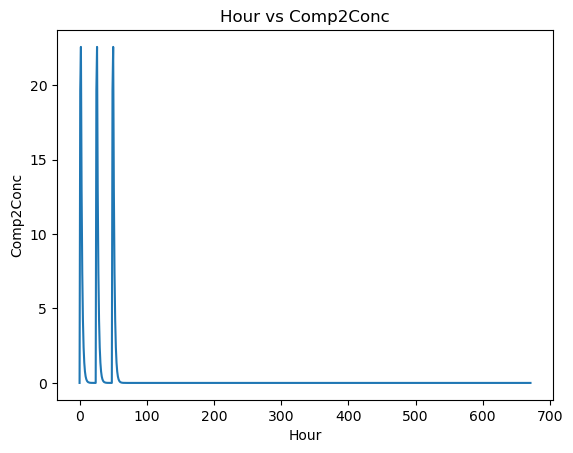

In [13]:
#Plotting Concentration as a function of Time
plt.plot(df['HOUR'],df['COMP2CONC'])
plt.xlabel('Hour')  # X-axis label
plt.ylabel('Comp2Conc')  # Y-axis label
plt.title('Hour vs Comp2Conc')  # Plot title

In [15]:
# Running model for 10 patients
command_10_patients = "C:/Users/tus88262/Documents/GitHub/antimalarial_pk_pd/build/Debug/run_ppq_pk.exe -lum -n 10"
output_10_patients = subprocess.run(command_10_patients, capture_output=True, text=True)
lines_10_patients = output_10_patients.stdout.splitlines()
df_10_patients = pd.DataFrame([line.split(',') for line in lines_10_patients], columns=["PID","HOUR","COMP2CONC","PARASITEDENSITY"])
df_10_patients = df_10_patients.iloc[1:]
df_10_patients = df_10_patients.apply(pd.to_numeric, errors='coerce')

In [17]:
df_10_patients

,PID,HOUR,COMP2CONC,PARASITEDENSITY
1,0,0.0,0.000,1000.000
2,0,1.0,467.979,1000.000
3,0,2.0,893.614,1000.000
4,0,3.0,1279.834,999.859
5,0,4.0,1629.381,993.720
...,...,...,...,...
6716,9,667.0,122.365,0.005
6717,9,668.0,121.838,0.005
6718,9,669.0,121.314,0.005
6719,9,670.0,120.792,0.005


C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


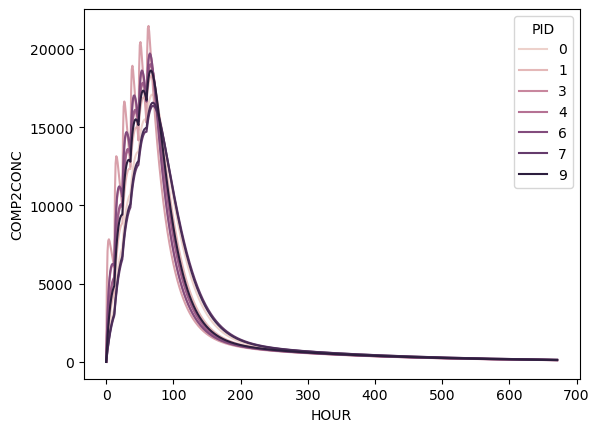

In [19]:
#Creating a spaghetti plot using seaborn
sns.lineplot(x='HOUR', y='COMP2CONC', hue='PID', data=df_10_patients)
plt.show()

C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


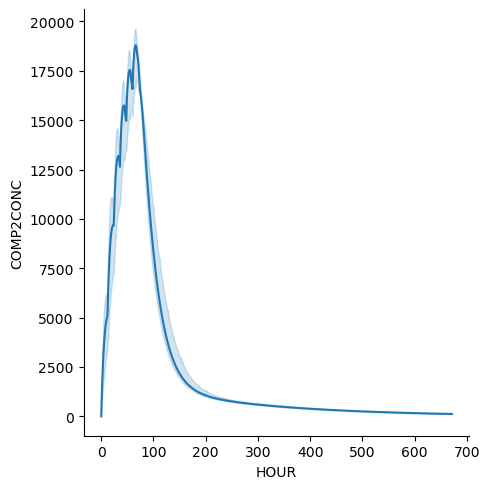

In [21]:
sns.relplot(x='HOUR', y='COMP2CONC', estimator='median', errorbar=('ci', 95), data=df_10_patients, kind="line")
plt.show()

In [23]:
df_10_patients_wide = df_10_patients.pivot(index="HOUR", columns="PID", values="COMP2CONC")
df_10_patients_wide

PID,0,1,2,3,4,5,6,7,8,9
HOUR,,,,,,,,,,
0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1.0,467.979,710.595,5103.361,1660.092,1028.315,1076.615,1741.775,388.737,408.025,844.499
2.0,893.614,1337.507,7078.252,2947.332,1898.781,1982.116,3076.338,745.765,781.883,1576.827
3.0,1279.834,1888.504,7734.598,3934.067,2631.256,2738.908,4086.347,1073.046,1123.746,2208.935
4.0,1629.381,2370.686,7839.049,4678.965,3243.227,3366.601,4838.080,1372.434,1435.665,2751.582
...,...,...,...,...,...,...,...,...,...,...
667.0,134.090,125.004,111.356,115.773,119.920,119.422,115.463,139.864,138.225,122.365
668.0,133.519,124.467,110.871,115.272,119.402,118.907,114.963,139.271,137.638,121.838
669.0,132.950,123.933,110.389,114.773,118.887,118.394,114.465,138.681,137.054,121.314


In [31]:
df_10_patients_wide['PID==2']

KeyError: 'PID==2'

C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


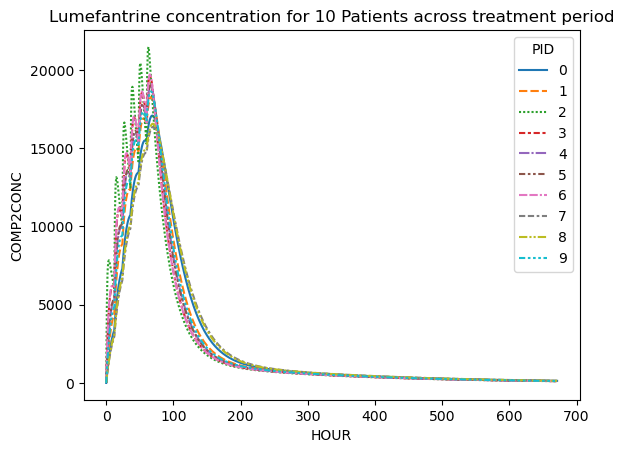

In [33]:
sns.lineplot(data=df_10_patients_wide).set(title='Lumefantrine concentration for 10 Patients across treatment period', ylabel='COMP2CONC')
plt.show()

C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


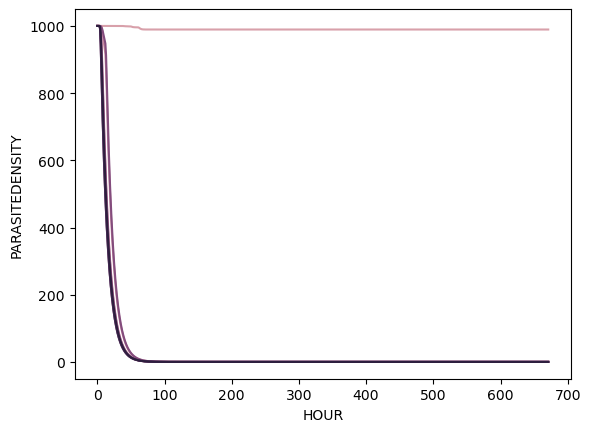

In [34]:
#Creating a spaghetti plot using seaborn
sns.lineplot(x='HOUR', y='PARASITEDENSITY', hue='PID', data=df_10_patients, legend=False)
plt.show()

C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


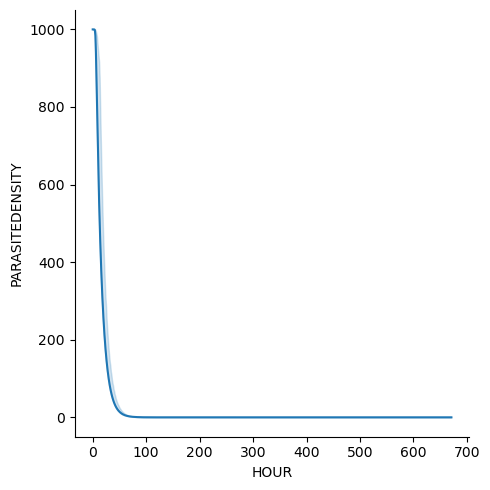

In [37]:
sns.relplot(x='HOUR', y='PARASITEDENSITY', estimator='median', errorbar=('ci', 95), data=df_10_patients,kind="line")
plt.show()

In [38]:
df_10_patients_wide_02 = df_10_patients.pivot(index="HOUR", columns="PID", values="PARASITEDENSITY")
df_10_patients_wide_02

PID,0,1,2,3,4,5,6,7,8,9
HOUR,,,,,,,,,,
0.0,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000
1.0,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000
2.0,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000
3.0,999.859,999.923,1000.000,999.993,999.965,999.969,999.995,999.829,999.837,999.945
4.0,993.720,996.920,1000.000,999.862,998.873,999.037,999.896,992.197,992.593,997.969
...,...,...,...,...,...,...,...,...,...,...
667.0,0.000,0.002,989.323,0.190,0.014,0.018,0.242,0.000,0.000,0.005
668.0,0.000,0.002,989.323,0.190,0.014,0.018,0.242,0.000,0.000,0.005
669.0,0.000,0.002,989.323,0.190,0.014,0.018,0.242,0.000,0.000,0.005


C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


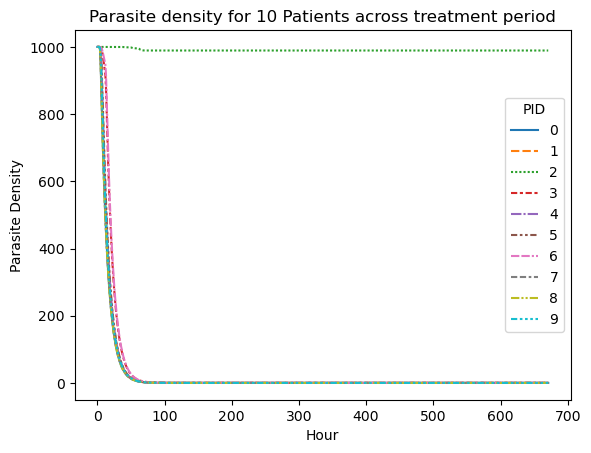

In [39]:
sns.lineplot(data=df_10_patients_wide_02).set(title='Parasite density for 10 Patients across treatment period', ylabel='Parasite Density',xlabel='Hour')
plt.show()

In [40]:
# Running model for 100 patients
command_100_patients = "C:/Users/tus88262/Documents/GitHub/antimalarial_pk_pd/build/Debug/run_ppq_pk.exe -lum -n 100"
output_100_patients = subprocess.run(command_100_patients, capture_output=True, text=True)
lines_100_patients = output_100_patients.stdout.splitlines()
df_100_patients = pd.DataFrame([line.split(',') for line in lines_100_patients], columns=["PID","HOUR","COMP2CONC","PARASITEDENSITY"])
df_100_patients = df_100_patients.iloc[1:]
df_100_patients = df_100_patients.apply(pd.to_numeric, errors='coerce')

In [41]:
df_100_patients

,PID,HOUR,COMP2CONC,PARASITEDENSITY
1,0,0.0,0.000,1000.000
2,0,1.0,4303.834,1000.000
3,0,2.0,6358.324,1000.000
4,0,3.0,7262.368,1000.000
5,0,4.0,7580.696,1000.000
...,...,...,...,...
67196,99,667.0,118.761,0.025
67197,99,668.0,118.248,0.025
67198,99,669.0,117.737,0.025
67199,99,670.0,117.229,0.025


Text(0.5, 1.0, 'Lumefantrine concentration for 100 Patients across treatment period')

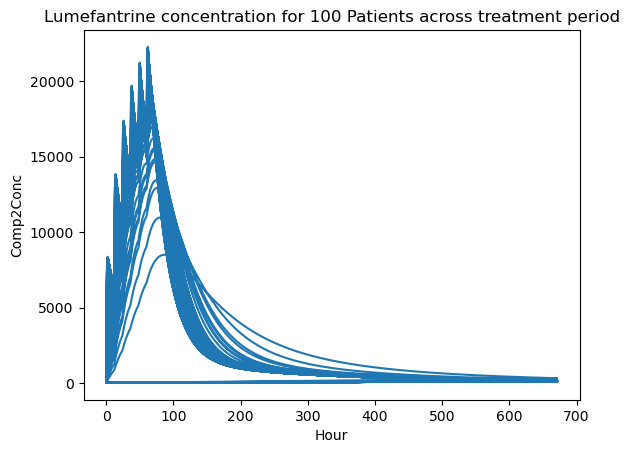

In [42]:
#Plotting Concentration as a function of Time for 100 patients
plt.plot(df_100_patients['HOUR'],df_100_patients['COMP2CONC'])
plt.xlabel('Hour')  # X-axis label
plt.ylabel('Comp2Conc')  # Y-axis label
plt.title('Lumefantrine concentration for 100 Patients across treatment period')  # Plot title

C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


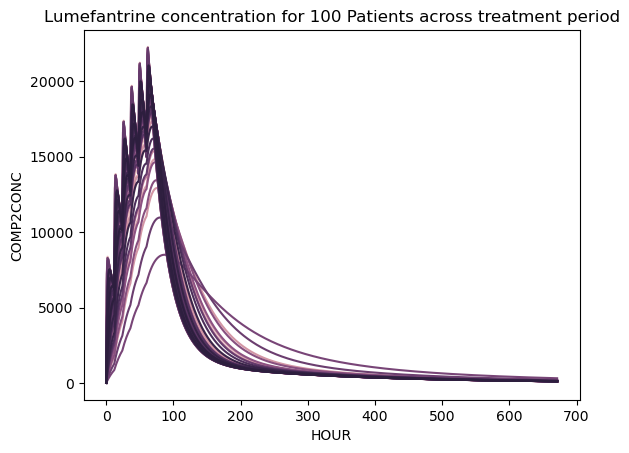

In [43]:
#Creating a spaghetti plot using seaborn
sns.lineplot(x='HOUR', y='COMP2CONC', hue='PID', data=df_100_patients, legend=False).set_title('Lumefantrine concentration for 100 Patients across treatment period')
plt.show()

In [44]:
df_100_patients_wide = df_100_patients.pivot(index="HOUR", columns="PID", values="COMP2CONC")
df_100_patients_wide
#lumefantrine conc model is stochastic

PID,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
HOUR,,,,,,,,,,,,,,,,,,,,,
0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1.0,4303.834,942.227,959.051,1258.628,2207.605,455.438,2193.620,744.861,550.079,3345.946,...,1601.576,1224.515,1053.836,2694.332,458.017,733.381,2812.779,4040.091,1925.256,1148.831
2.0,6358.324,1748.943,1778.358,2291.438,3783.301,870.310,3762.789,1399.133,1045.308,5304.901,...,2853.992,2234.033,1942.879,4469.700,875.106,1378.516,4628.651,6089.008,3360.635,2105.736
3.0,7262.368,2435.970,2474.481,3132.397,4887.811,1247.372,4865.366,1971.540,1489.907,6405.486,...,3822.762,3060.104,2688.307,5609.509,1254.057,1943.801,5768.209,7060.538,4415.457,2897.322
4.0,7580.696,3017.380,3062.124,3810.558,5641.641,1589.212,5619.958,2470.027,1887.798,6976.440,...,4561.442,3729.832,3308.711,6310.770,1597.489,2436.889,6450.055,7451.474,5175.141,3546.670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667.0,111.756,120.939,120.725,117.906,114.142,134.854,114.174,124.232,130.030,112.477,...,116.016,118.155,119.651,113.257,134.693,124.482,113.088,111.922,114.865,118.761
668.0,111.271,120.418,120.205,117.397,113.647,134.280,113.679,123.698,129.474,111.989,...,115.513,117.644,119.135,112.765,134.120,123.947,112.597,111.435,114.367,118.248
669.0,110.787,119.899,119.686,116.889,113.154,133.709,113.186,123.167,128.921,111.502,...,115.013,117.136,118.621,112.276,133.549,123.415,112.109,110.951,113.872,117.737


C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


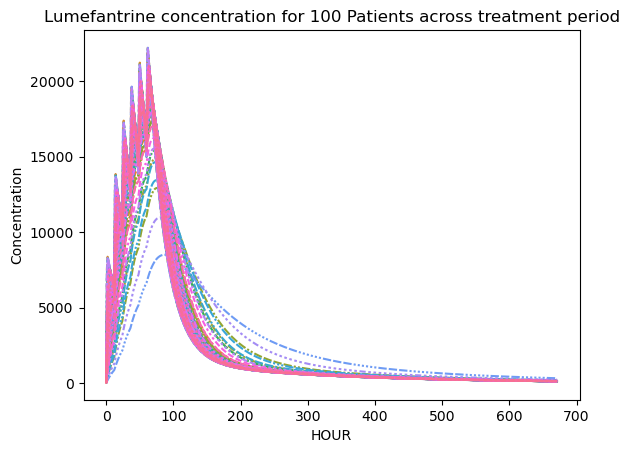

In [45]:
sns.lineplot(data=df_100_patients_wide,legend=False).set(title='Lumefantrine concentration for 100 Patients across treatment period',ylabel='Concentration')
plt.show()

C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


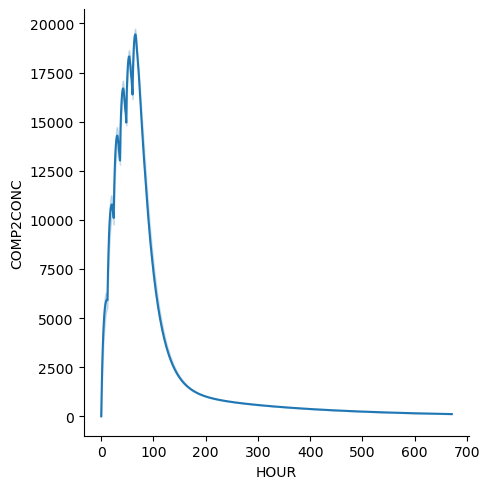

In [46]:
sns.relplot(x='HOUR', y='COMP2CONC', estimator='median', errorbar=('ci', 95), data=df_100_patients,kind="line")
plt.show()

C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

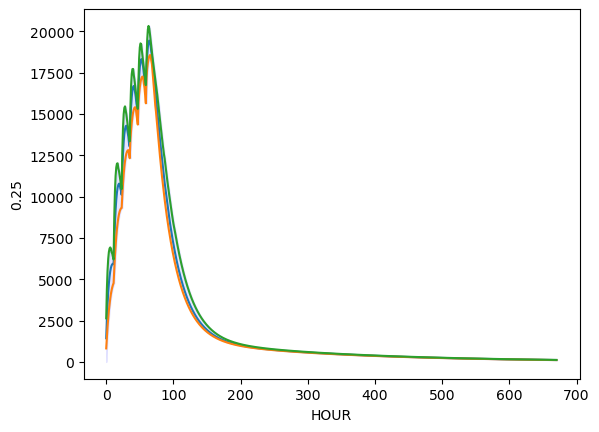

In [47]:
import numpy as np
import seaborn as sns

# Calculate the median, 25th percentile, and 75th percentile
median_comp2conc = df_100_patients_wide.median(axis=1)
perc_25_comp2conc = df_100_patients_wide.quantile(0.25,axis=1)
perc_75_comp2conc = df_100_patients_wide.quantile(0.75,axis=1)

plot = sns.lineplot(x=df_100_patients['HOUR'],y=median_comp2conc)
plot = sns.lineplot(x=df_100_patients['HOUR'],y=perc_25_comp2conc)
plot = sns.lineplot(x=df_100_patients['HOUR'],y=perc_75_comp2conc)

plt.fill_between(np.arange(672), perc_25_comp2conc, perc_75_comp2conc, color='blue', alpha=0.1)

#Shade area first and then plot lines (?)

Text(0.5, 1.0, 'Parasite Density as a function of Time for 100 Patients')

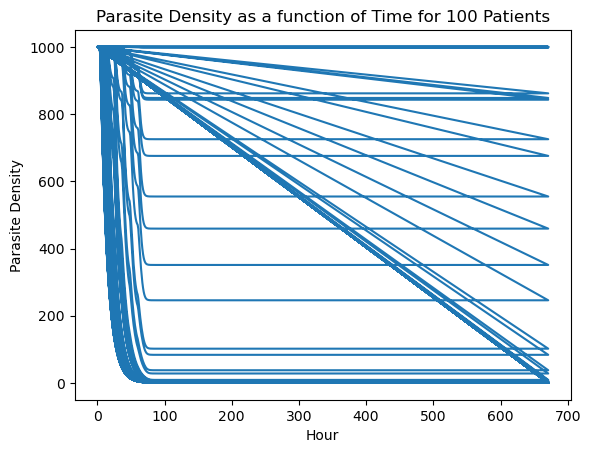

In [48]:
#Plotting Parasite Density as a function of Time for 100 patients
plt.plot(df_100_patients['HOUR'],df_100_patients['PARASITEDENSITY'])
plt.xlabel('Hour')  # X-axis label
plt.ylabel('Parasite Density')  # Y-axis label
plt.title('Parasite Density as a function of Time for 100 Patients')  # Plot title
#Fix it, group by PID

C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


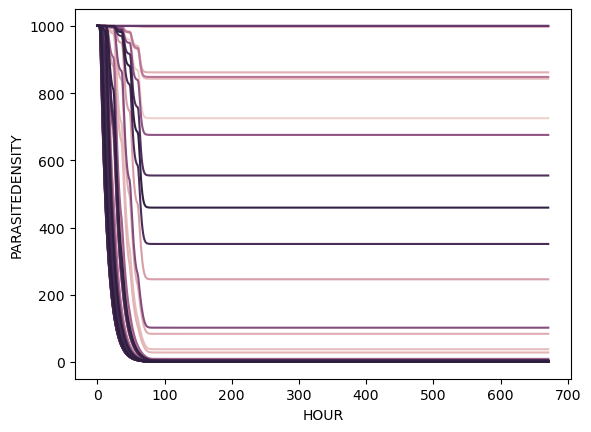

In [49]:
#Creating a spaghetti plot using seaborn
sns.lineplot(x='HOUR', y='PARASITEDENSITY', hue='PID', data=df_100_patients, legend=False)
plt.show()
#lum ng/ml or mg/mL

C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


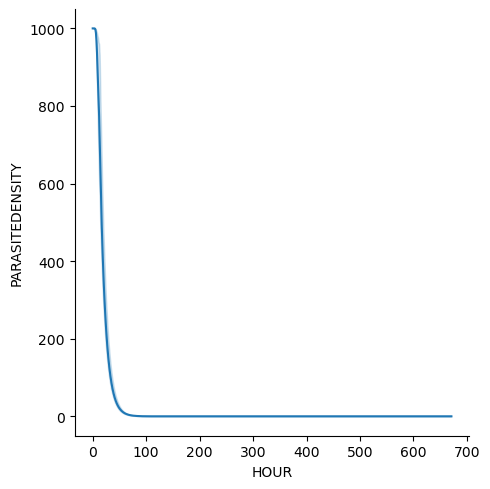

In [50]:
sns.relplot(x='HOUR', y='PARASITEDENSITY', estimator='median', errorbar=('ci', 95), data=df_100_patients,kind="line")
plt.show()

In [51]:
df_100_patients_wide_02 = df_100_patients.pivot(index="HOUR", columns="PID", values="PARASITEDENSITY")
df_100_patients_wide_02

PID,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
HOUR,,,,,,,,,,,,,,,,,,,,,
0.0,1000.00,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,...,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000
1.0,1000.00,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,...,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000
2.0,1000.00,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,...,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000
3.0,1000.00,999.957,999.959,999.981,999.998,999.855,999.998,999.929,999.885,1000.000,...,999.992,999.979,999.968,1000.000,999.856,999.927,1000.000,1000.000,999.997,999.975
4.0,1000.00,998.512,998.590,999.471,999.979,993.497,999.978,997.228,995.029,1000.000,...,999.832,999.408,998.963,999.996,993.543,997.128,999.997,1000.000,999.944,999.240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667.0,725.33,0.009,0.010,0.041,0.769,0.000,0.742,0.002,0.000,37.739,...,0.158,0.036,0.016,3.335,0.000,0.002,4.951,459.235,0.390,0.025
668.0,725.33,0.009,0.010,0.041,0.769,0.000,0.742,0.002,0.000,37.739,...,0.158,0.036,0.016,3.335,0.000,0.002,4.951,459.235,0.390,0.025
669.0,725.33,0.009,0.010,0.041,0.769,0.000,0.742,0.002,0.000,37.739,...,0.158,0.036,0.016,3.335,0.000,0.002,4.951,459.235,0.390,0.025


C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

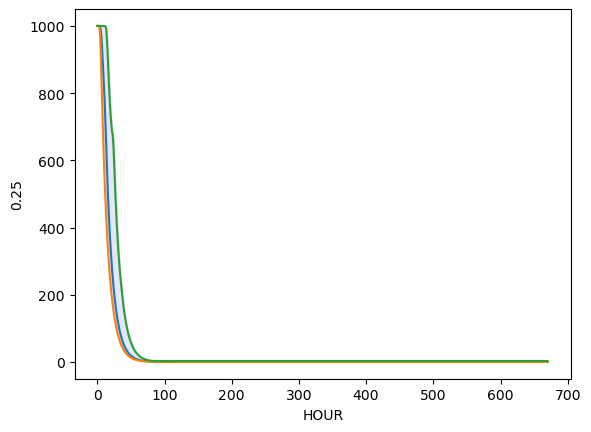

In [52]:
import numpy as np
import seaborn as sns

# Calculate the median, 25th percentile, and 75th percentile
median_parasite_density = df_100_patients_wide_02.median(axis=1)
perc_25_parasite_density = df_100_patients_wide_02.quantile(0.25,axis=1)
perc_75_parasite_density = df_100_patients_wide_02.quantile(0.75,axis=1)

plot = sns.lineplot(x=df_100_patients['HOUR'],y=median_parasite_density)
plot = sns.lineplot(x=df_100_patients['HOUR'],y=perc_25_parasite_density)
plot = sns.lineplot(x=df_100_patients['HOUR'],y=perc_75_parasite_density)

plt.fill_between(np.arange(672), perc_25_parasite_density, perc_75_parasite_density, color='blue', alpha=0.1)
